## Welcome to my EDA
__This time we're gonna explore the data from amazone website__
  

__Firstly, lets import the module that we need__

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

__Here's the csv that i got from laptop category on amazon__

In [2]:

testing = pd.read_csv("amazon_laptop_products.csv")

__The data not perfect yet, so let's fix it!__  
  
__Start from generalize the format__

In [3]:
testing["price"] = (
    testing["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

testing["rating"] = pd.to_numeric(testing["rating"], errors="coerce")
testing["total_buy"] = (
    testing["total_buy"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

__Were noticing that the data we're not complete__

In [4]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      312 non-null    object 
 1   price      284 non-null    float64
 2   rating     296 non-null    float64
 3   total_buy  296 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.9+ KB


__Drop it off__

In [5]:
testing.dropna(inplace=True)
testing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 0 to 310
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      271 non-null    object 
 1   price      271 non-null    float64
 2   rating     271 non-null    float64
 3   total_buy  271 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.6+ KB


__Split it by space and get the first 6 words__

In [6]:
temp_column = testing["title"]
temp_column = temp_column.str.replace(",", "")
new_title = temp_column.astype(str).str.split(" ",expand=True).iloc[:,0:6]
new_title


,0,1,2,3,4,5
0,HP,14,Laptop,Intel,Celeron,N4020
1,Laptop,Laptop,Computer,with,Intel,N97
3,ASUS,ROG,Strix,G16,(2025),Gaming
4,Laptop,16-inch,8GB,DDR,256GB,SSD
5,Acer,Aspire,3,A315-24P-R7VH,Slim,Laptop
...,...,...,...,...,...,...
306,acer,Aspire,Laptop,"14""",WUXGA,Touch
307,Kipling,Women's,Seoul,Extra,Large,17”
308,2025,Gaming,Laptop,15.6,Inch,Laptop
309,Lenovo,IdeaPad,3,Laptop,"15.6""",FHD


__Merge it in one column__

In [7]:
new_title["merged"] = new_title[0] + " " + new_title[1] + " " + new_title[2] + " " + new_title[3] + " " + new_title[4] + " " + new_title[5]
new_title["merged"] = new_title["merged"].str.title()
new_title

,0,1,2,3,4,5,merged
0,HP,14,Laptop,Intel,Celeron,N4020,Hp 14 Laptop Intel Celeron N4020
1,Laptop,Laptop,Computer,with,Intel,N97,Laptop Laptop Computer With Intel N97
3,ASUS,ROG,Strix,G16,(2025),Gaming,Asus Rog Strix G16 (2025) Gaming
4,Laptop,16-inch,8GB,DDR,256GB,SSD,Laptop 16-Inch 8Gb Ddr 256Gb Ssd
5,Acer,Aspire,3,A315-24P-R7VH,Slim,Laptop,Acer Aspire 3 A315-24P-R7Vh Slim Laptop
...,...,...,...,...,...,...,...
306,acer,Aspire,Laptop,"14""",WUXGA,Touch,"Acer Aspire Laptop 14"" Wuxga Touch"
307,Kipling,Women's,Seoul,Extra,Large,17”,Kipling Women'S Seoul Extra Large 17”
308,2025,Gaming,Laptop,15.6,Inch,Laptop,2025 Gaming Laptop 15.6 Inch Laptop
309,Lenovo,IdeaPad,3,Laptop,"15.6""",FHD,"Lenovo Ideapad 3 Laptop 15.6"" Fhd"


__Change the title before__

In [8]:
testing["title"] = new_title["merged"]
testing

,title,price,rating,total_buy
0,Hp 14 Laptop Intel Celeron N4020,172.16,4.1,3877.0
1,Laptop Laptop Computer With Intel N97,369.00,5.0,16.0
3,Asus Rog Strix G16 (2025) Gaming,1274.99,4.6,80.0
4,Laptop 16-Inch 8Gb Ddr 256Gb Ssd,199.99,5.0,16.0
5,Acer Aspire 3 A315-24P-R7Vh Slim Laptop,319.99,4.2,4219.0
...,...,...,...,...
306,"Acer Aspire Laptop 14"" Wuxga Touch",580.00,3.8,14.0
307,Kipling Women'S Seoul Extra Large 17”,72.00,4.7,806.0
308,2025 Gaming Laptop 15.6 Inch Laptop,549.99,3.8,4.0
309,"Lenovo Ideapad 3 Laptop 15.6"" Fhd",499.00,4.2,273.0


__Is there any correlation?__

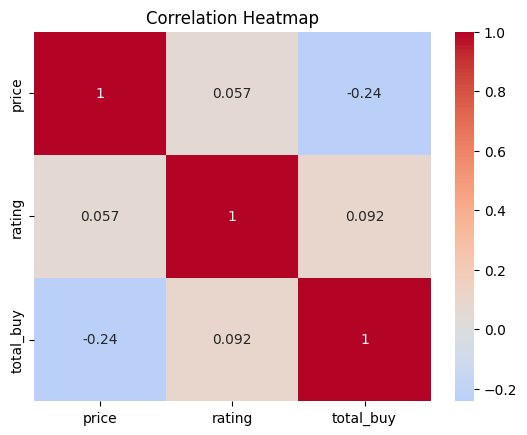

In [9]:
corr = testing[["price", "rating", "total_buy"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


_rating with price or total buy makes just small correlation_  
__More closer the index to 1, more correlation the columns are__

__Visualize the most expensive laptop by rating__

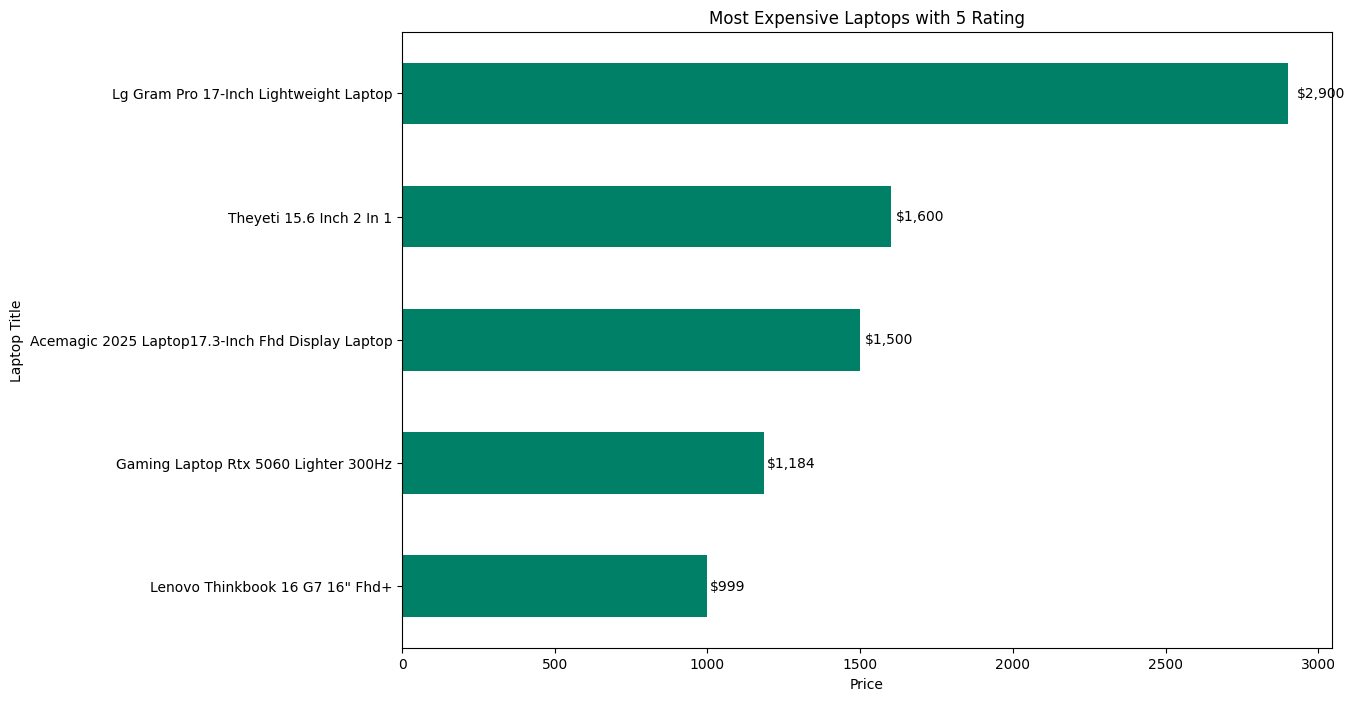

In [10]:
good_laptops = (
    testing[testing["rating"] == 5]              
    .sort_values(by="price", ascending=False)   
    .head(5)                                     
    .reset_index(drop=True)
)

ax = good_laptops.plot(
    kind="barh",
    x="title",
    y="price",
    legend=False,
    figsize=(12, 8),
    cmap="summer"
)

plt.title("Most Expensive Laptops with 5 Rating")
plt.xlabel("Price")
plt.ylabel("Laptop Title")

for p in ax.patches:
    ax.text(
        p.get_width() + (p.get_width()*0.01),  
        p.get_y() + p.get_height()/2,           
        f"${p.get_width():,.0f}",              
        va="center"
    )
ax.invert_yaxis() 

plt.show()


__The most bought item__

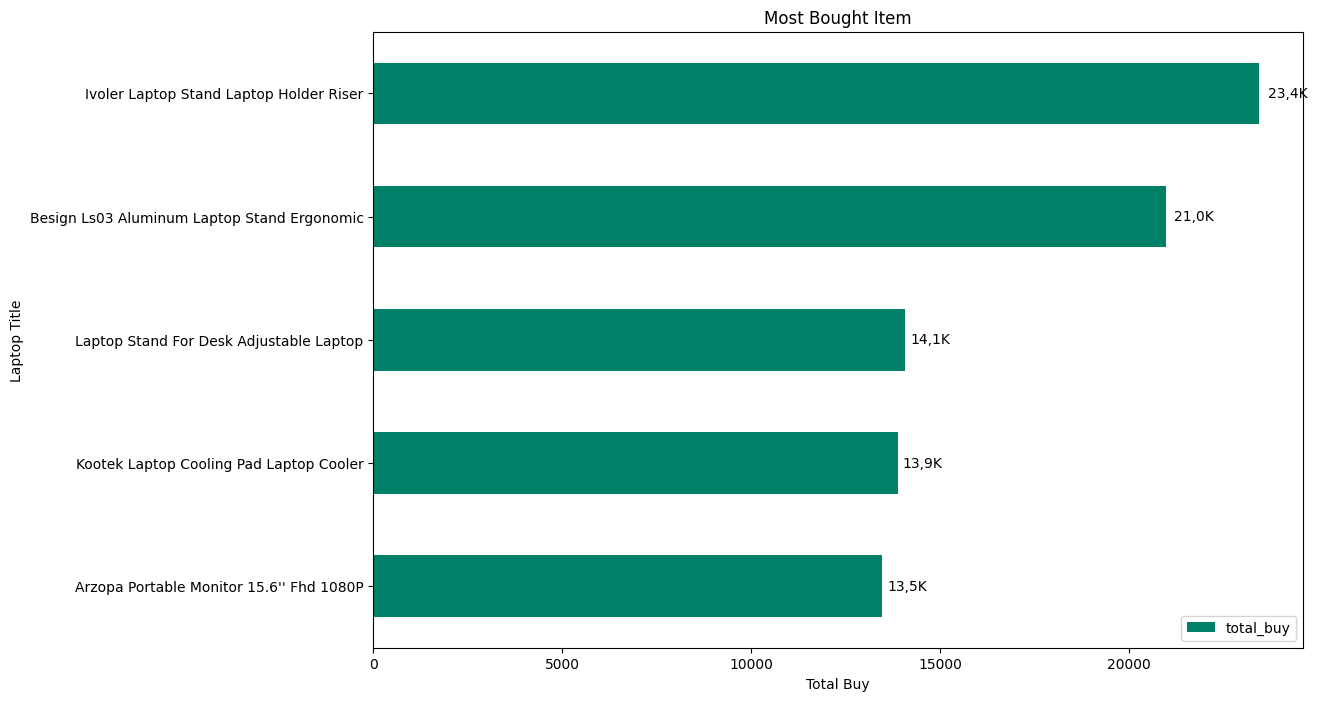

In [11]:
most_bought = testing[["title","total_buy"]].sort_values(by="total_buy", ascending=False).head(5).reset_index(drop=True)
ax = most_bought.plot(
    kind="barh", 
    x="title", 
    y="total_buy",
    figsize=[12,8],
    cmap="summer"
    )
for p in ax.patches:
    ax.text(
    p.get_width() + (p.get_width() * 0.01),
    p.get_y() + p.get_height() / 2,
    (lambda x: f"{x/1_000_000:.1f}M".replace(".", ",") if x >= 1_000_000 
     else f"{x/1_000:.1f}K".replace(".", ",") if x >= 1_000 
     else str(int(x)))(p.get_width()),
    va="center"
)

plt.title("Most Bought Item")
plt.xlabel("Total Buy")
plt.ylabel("Laptop Title")
ax.invert_yaxis() 
plt.show()

_We're noticing here, that not all item is specific laptop_

__So the most worth it item by highest rating, highest bought, and lowest price is__

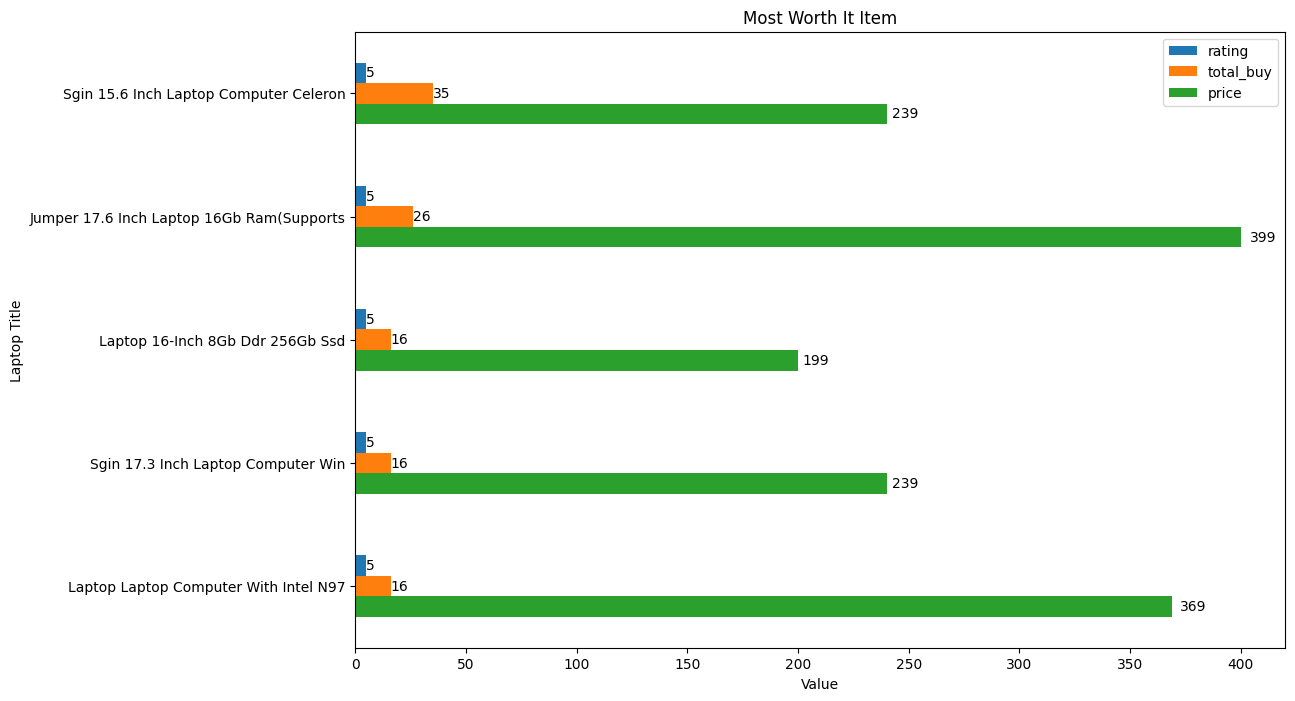

In [12]:
worth_it_item = testing.sort_values(by=["rating", "total_buy", "price"], ascending=[False, False, True]).head(5).reset_index(drop=True)
ax = worth_it_item.plot(
    kind="barh", 
    x="title", 
    y=["rating", "total_buy", "price"], 
    figsize=(12,8)
)
for p in ax.patches:
    ax.text(
    p.get_width() + (p.get_width() * 0.01),
    p.get_y() + p.get_height() / 2,
    str(int(p.get_width())),
    va="center"
)

plt.title("Most Worth It Item")
plt.xlabel("Value")
plt.ylabel("Laptop Title")
ax.invert_yaxis()
plt.show()